### Video 1/8

In [1]:
import pandas as pd
import torch

In [2]:
import numpy as np

In [3]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print (x*y)

tensor([10.,  3.])


In [5]:
x = torch.zeros([2,5])
x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [6]:
x.shape

torch.Size([2, 5])

In [7]:
y = torch.rand([2,5])
y

tensor([[0.5804, 0.7857, 0.5129, 0.2247, 0.0769],
        [0.4875, 0.5909, 0.4646, 0.5065, 0.2321]])

In [8]:
y.view([1,10])

tensor([[0.5804, 0.7857, 0.5129, 0.2247, 0.0769, 0.4875, 0.5909, 0.4646, 0.5065,
         0.2321]])

In [11]:
# y.view([3,3])
# will show error

In [10]:
y

tensor([[0.5804, 0.7857, 0.5129, 0.2247, 0.0769],
        [0.4875, 0.5909, 0.4646, 0.5065, 0.2321]])

### Video 2/8

In [13]:
import torchvision
from torchvision import transforms,datasets

In [18]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [19]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [20]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

prints one batch

In [21]:
x, y = data[0][0], data[1][0]

print (y)

tensor(2)


In [22]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [23]:
import matplotlib.pyplot as plt

# plt.imshow(data[0][0])
# plt.show()

# the above will show error - invalid shape

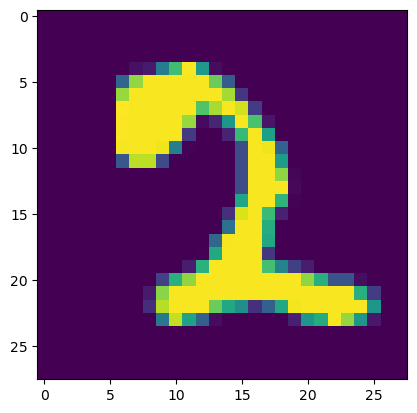

In [25]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [26]:
# to check whether the dataset is balanced or imbalanced

In [27]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [30]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total * 100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


### Video 3/8

In [31]:
import torch.nn as nn
import torch.nn.functional as F

In [32]:
28*28

784

In [35]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # self.fc1 = nn.Linear(input, output)
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) 
        # softmax to get probability of each class in multi class

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [36]:
X = torch.rand((28,28))
X

tensor([[1.5880e-01, 4.6800e-01, 9.9794e-01, 8.8162e-01, 5.5779e-01, 6.7601e-01,
         7.5498e-02, 2.5410e-01, 5.6815e-01, 1.0124e-01, 7.6957e-01, 6.3784e-01,
         5.7622e-01, 8.1824e-01, 4.2674e-01, 1.9970e-01, 8.2550e-01, 2.4260e-02,
         6.5708e-01, 5.3663e-01, 8.4298e-01, 6.8547e-01, 6.1331e-01, 5.6969e-01,
         5.5796e-01, 3.8534e-01, 1.4528e-01, 6.5693e-01],
        [3.6204e-01, 9.2397e-02, 7.5743e-01, 2.5570e-01, 9.9745e-01, 1.1281e-01,
         5.6214e-01, 1.7355e-01, 3.1214e-01, 5.5690e-01, 1.7261e-01, 7.3537e-01,
         5.0242e-01, 2.5997e-01, 8.1399e-01, 4.3118e-01, 7.5199e-01, 3.9287e-01,
         9.8372e-01, 2.8450e-01, 4.3469e-01, 5.4945e-01, 1.9034e-01, 6.1571e-01,
         2.2612e-01, 2.2857e-01, 9.9388e-01, 1.2297e-01],
        [2.5945e-01, 4.1290e-01, 6.2647e-01, 6.2105e-01, 9.6431e-01, 4.3734e-01,
         3.2189e-01, 6.0676e-01, 1.2152e-01, 4.5239e-01, 5.2908e-01, 3.1576e-02,
         6.8038e-01, 1.8408e-01, 8.5090e-01, 1.1480e-01, 6.3906e-01, 9.294

In [42]:
# output = net(X)
# error: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x64)

# X = X.view(28*28)
# output = net(X)
# same as above

# X = X.view([28*28])
# output = net(X)
# same as above

X = X.view(-1, 28*28)
output = net(X)

In [43]:
output

tensor([[-2.4792, -2.4258, -2.1764, -2.2797, -2.0887, -2.1846, -2.4440, -2.3337,
         -2.2827, -2.4091]], grad_fn=<LogSoftmaxBackward0>)

In [44]:
X = X.view(1, 28*28)
output = net(X)
output

tensor([[-2.4792, -2.4258, -2.1764, -2.2797, -2.0887, -2.1846, -2.4440, -2.3337,
         -2.2827, -2.4091]], grad_fn=<LogSoftmaxBackward0>)

**Imp...**

-1 represents any size of data and that is why used often

### Video 4/8

In [47]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

    print(loss)

tensor(0.1517, grad_fn=<NllLossBackward0>)
tensor(0.0296, grad_fn=<NllLossBackward0>)
tensor(0.4940, grad_fn=<NllLossBackward0>)


In [48]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))

        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.976


<function matplotlib.pyplot.show(close=None, block=None)>

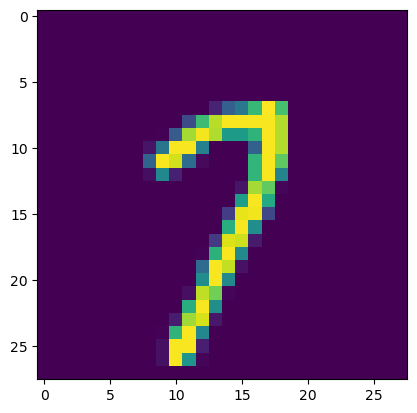

In [49]:
plt.imshow(X[0].view(28,28))
plt.show

In [50]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(7)


tensor(1)


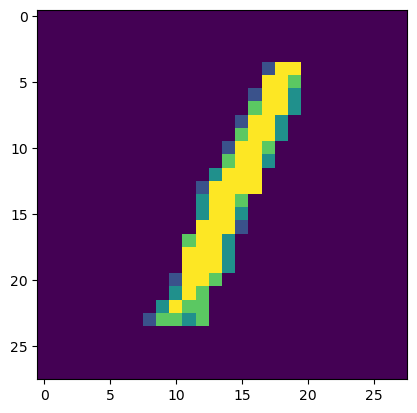

In [51]:
plt.imshow(X[1].view(28,28))
plt.show

print(torch.argmax(net(X[1].view(-1, 784))[0]))

### Video 5/8 - preparing the data

In [58]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True
# can change this to false after we have run this code for once
# created our dataset with the images - dont want to use extra space/memory

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
    DOGS = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"
    
    LABELS = {CATS:0, DOGS:1}
    
    training_data = []
    catCount = 0
    dogCount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            
            # iterating over all the images in the directory
            # tqdm - just to tell the progress (where the iterator is)
            for f in tqdm(os.listdir(label)):    
                try:
                    path = os.path.join(label, f)
                    # label - path of directory
                    # f - path of the iamge
                    # label + f
                    
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    # converts img to grayscale
                    # WHY? - color is an added data (which we dont need)
                    # greyscale does not decreases another dimension (its just reduces unrequired data)
                    
                    # important though - do colors matter in recognizing cats & dogs
                    
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    # numpy array of img & class labels (used one hot vector)
                    # for a cat: [1, 0]
                    # for a dog: [0, 1]

                    # one hot encoding
                    # np.eye(2)[0] -> o/p: array([1., 0.]) -> for a cat
                    # np.eye(2)[1] -> o/p: array([0., 1.]) -> for a dog
                    
                    if label == self.CATS:
                        self.catCount += 1
                    elif label == self.DOGS:
                        self.dogCount += 1
                
                except Exception as e:
                    # print(str(e))
                    pass
                # why try & except - because some of the images might not be good
                # so if we try to load them in, might get an error
        
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catCount)
        print("Dogs:", self.dogCount)

# using the flag created above
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

ModuleNotFoundError: No module named 'cv2'

for cv2

pip install opencv-python

In [54]:
# training_data = np.load("training_data.npy")
# above might throw and error
training_data = np.load("training_data.npy", allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'training_data.npy'

In [55]:
print(len(training_data))

NameError: name 'training_data' is not defined

In [56]:
print(training_data[0])

NameError: name 'training_data' is not defined

In [57]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0])
plt.show()

# this one might be better
# plt.imshow(training_data[1][0], cmap="gray")

NameError: name 'training_data' is not defined

### Video 6/8 - building the model

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # build our networks
        
        self.conv1 = nn.Conv2d(1, 32, 5) # 2d convolutional layer
        # input, output, kernel size(window size)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        # after doing these we need to have a linear layer for output
        # but there is no documentation to do how
        # so we need to figure it out how

        # eg: for above issue
        # self.fc1 = nn.Linear(???, 512)
        # self.fc2 = nn.Linear(512, 2) # 2 -> classes/labels
        # what value to put to in place of ???

        # to figure this out we will have to pass a random data to it
        x = torch.randn(50, 50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x) # to run forward the 3 conv layers

        # now doing this after finding the value of ???
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)

    def convs(self, x):
        # method to run forward the 3 conv layers
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

        # to see the o/p
        print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x) # pass i through all the convolutional layers
        x = x.view(-1, self._to_linear) # flatten it
        x = F.relu(self.fc1(x)) # pass it through 1st fully connected layer
        x = self.fc2(x)
        # return x 
        
        # better with an activation function
        return F.softmax(x, dim=1)

net = Net()

torch.Size([128, 2, 2])


#### passing through the data

In [62]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
# reshaped the data
X = X/255.0
# scalinng the images
y = torch.Tensor([i[1] for i in training_data])

# splitting training/testing data
VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

NameError: name 'training_data' is not defined

In [63]:
train_X = X[: -val_size]
train_y = y[: -val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

NameError: name 'val_size' is not defined

In [64]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        # print(i, i+BATCH_SIZE)

        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()
        # can use optimizer.zero... 
        # depending on no of models or no of optimizers being used

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

print(loss)

NameError: name 'tqdm' is not defined

In [65]:
# prediction

correct = 0
total = 0
with torch.no_grad():
    for i in tqdm (range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1

print("Accuracy: ", round(correct/total, 3))

NameError: name 'tqdm' is not defined

### Video 7/8
for GPU

### Video 8/8 - basic model analysis

In [66]:
# testing

def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)

    # calculating accuracy
    matches = [torch.argmax(i) == torch.argmax(j) for i,j, in zip(outputs,y)]
    acc = matches.count(True) / len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()
    
    return acc, loss

In [67]:
def test(size=32):
    random_start = np.random.randint(len(test_X) - size)
    X, y, = test_X[random_start : random_start + size], test_y[random_start : random_start + size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1, 1, 50, 50), y)
    return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)

NameError: name 'test_X' is not defined

In [72]:
import time

MODEL_NAME = f"model-{int(time.time())}"

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 100
    EPOCHS = 5
    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
                batch_y = train_y[i:i+BATCH_SIZE]

                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME}.{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

train()

torch.Size([128, 2, 2])
model-1726841944


NameError: name 'tqdm' is not defined

In [70]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

model_name = ""    # (model name from above)

def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split('\n')

    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses = []

    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
            
            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))

            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))

    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (0,0), sharex=ax1)

    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)

    ax2.plot(times, losses, label="loss")
    ax2.plot(times, val_losses, label="val_loss")
    ax2.legend(loc=2)

    plt.show()

create_acc_loss_graph(model_name)

FileNotFoundError: [Errno 2] No such file or directory: 'model.log'